In [42]:
import pandas as pd
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from matplotlib.colors import ColorConverter

In [27]:
db_df = pd.read_csv('drugbank_filtered.csv')
cs_df = pd.read_csv('{"model_family": "jova", "dataset": "egfr_1M17", "cviews": "ecfp8-gconv", "pviews": "rnn-psc", "split": "random", "mode": "case_study", "model_ds": "kiba", "target": "EGFR", "cv": "False", "seeds": "1", "date": "2020_01_27__16_10_30"}.csv')
EGFR_df = pd.read_csv('drugbank_EGFR.csv')
db_df.shape, cs_df.shape, EGFR_df.shape

((9484, 5), (9484, 11), (30, 5))

In [28]:
cs_df.head()

,dataset,y_true,y_pred,view1,entity1,top_segments1,view2,entity2,sequence,top_segments2,top_residues
0,egfr_cs,0.0,3.818894,gconv,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(CSc3nn...,"[['C', 12], ['C', 18], ['O', 9], ['C', 30], ['...",rnn,EGFR_1M17,GEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIP...,"['GEAPNQALLRILK', 'STVQLITQLMPFG', 'LKETEFKKIK...",['Gly672 Glu673 Ala674 Pro675 Asn676 Gln677 Al...
1,egfr_cs,0.0,3.960266,gconv,CC[Si](C)(C)C,"[['C', 4], ['C', 5], ['C', 1], ['Si', 2], ['C'...",rnn,EGFR_1M17,GEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIP...,"['AARNVLVKTPQHV', 'LEDRRLVHRDLAA', 'IPVAIKELRE...",['Ala815 Ala816 Arg817 Asn818 Val819 Leu820 Va...
2,egfr_cs,0.0,3.670584,gconv,O=C(/C=C/c1c(C(=O)O)[nH]c2cc(Cl)cc(Cl)c12)Nc1c...,"[['C', 5], ['O', 8], ['C', 11], ['C', 12], ['C...",rnn,EGFR_1M17,GEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIP...,"['GEAPNQALLRILK', 'STVQLITQLMPFG', 'LKETEFKKIK...",['Gly672 Glu673 Ala674 Pro675 Asn676 Gln677 Al...
3,egfr_cs,0.0,3.429179,gconv,N=C(O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,"[['C', 1], ['C', 32], ['C', 26], ['N', 25], ['...",rnn,EGFR_1M17,GEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIP...,"['GEAPNQALLRILK', 'STVQLITQLMPFG', 'LKETEFKKIK...",['Gly672 Glu673 Ala674 Pro675 Asn676 Gln677 Al...
4,egfr_cs,0.0,3.662991,gconv,O=C[C@H](CC(=O)O)NC(=O)[C@@H](CCCCNC(=O)c1ccc2...,"[['C', 18], ['O', 6], ['C', 14], ['C', 16], ['...",rnn,EGFR_1M17,GEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIP...,"['GEAPNQALLRILK', 'STVQLITQLMPFG', 'LKETEFKKIK...",['Gly672 Glu673 Ala674 Pro675 Asn676 Gln677 Al...


In [4]:
def get_canonical_smiles(smiles):
    can_smiles = Chem.MolToSmiles(Chem.MolFromSmiles(smiles), True)
    return can_smiles

In [29]:
predictions = {'id':[],'drug':[],'target':[], 'value':[], 'drugbank?':[]}
for idx, row in cs_df.iterrows():
    cs_smiles = get_canonical_smiles(row['entity1'])
    db_row = db_df[db_df['canonical_smiles']==cs_smiles]
    db_id = db_row['ID'].iloc[0]
    predictions['id'].append(db_id)
    predictions['drug'].append(db_row['Name'].iloc[0])
    predictions['target'].append(row['entity2'])
    predictions['value'].append(row['y_pred'])
    s = EGFR_df[EGFR_df['DRUGBANK ID']==db_id]
    if len(s) > 0:
        predictions['drugbank?'].append('yes')
    else:
        predictions['drugbank?'].append('no')    

In [30]:
predictions = pd.DataFrame(predictions)
predictions = predictions.sort_values('value', ascending=True).reset_index(drop=True)
predictions.head(50)

,id,drug,target,value,drugbank?
0,DB12818,NM-3,EGFR_1M17,1.807735,no
1,DB07788,"(3R,5Z,8S,9S,11E)-8,9,16-TRIHYDROXY-14-METHOXY...",EGFR_1M17,1.818073,no
2,DB06469,Lestaurtinib,EGFR_1M17,2.482526,no
3,DB01933,7-Hydroxystaurosporine,EGFR_1M17,2.508884,no
4,DB12381,Merestinib,EGFR_1M17,2.526963,no
5,DB01940,Balanol Analog 2,EGFR_1M17,2.582304,no
6,DB02521,"2,5,7-Trihydroxynaphthoquinone",EGFR_1M17,2.664596,no
7,DB15382,SAR-125844,EGFR_1M17,2.773633,no
8,DB06267,Udenafil,EGFR_1M17,2.803583,no
9,DB01905,2-(2-Hydroxy-5-Methoxy-Phenyl)-1h-Benzoimidazo...,EGFR_1M17,2.836282,no


In [31]:
predicted_true_dti = pd.DataFrame({k:[] for k in predictions.columns})
for idx, row in predictions.iterrows():
    if row['drugbank?'] == 'yes':
        predicted_true_dti = predicted_true_dti.append(row)
predicted_true_dti.head(50).reset_index()

,index,id,drug,target,value,drugbank?
0,13,DB15035,Zanubrutinib,EGFR_1M17,2.897150,yes
1,23,DB12267,Brigatinib,EGFR_1M17,2.969688,yes
2,229,DB13164,Olmutinib,EGFR_1M17,3.316660,yes
3,415,DB09330,Osimertinib,EGFR_1M17,3.405722,yes
4,1445,DB06021,AV-412,EGFR_1M17,3.598233,yes
5,1486,DB05944,Varlitinib,EGFR_1M17,3.601914,yes
6,2317,DB11963,Dacomitinib,EGFR_1M17,3.678804,yes
7,3415,DB07602,S-{3-[(4-ANILINOQUINAZOLIN-6-YL)AMINO]-3-OXOPR...,EGFR_1M17,3.747882,yes


In [33]:
# Select a drug
drug_ids = ['DB12267', 'DB06469']

# Collect the records in cs_df
selected_drugs_df = pd.DataFrame({k:[] for k in cs_df.columns})
for drug_id in drug_ids:
    for idx, row in cs_df.iterrows():
        cs_smiles = get_canonical_smiles(row['entity1'])
        db_row = db_df[db_df['canonical_smiles']==cs_smiles]
        db_id = db_row['ID'].iloc[0]
        if db_id == drug_id:
            row['drugbank_id'] = db_id
            row['drug_name'] = db_row['Name'].iloc[0]
            selected_drugs_df = selected_drugs_df.append(row)
selected_drugs_df.sort_values('y_pred').to_csv('selected_drugs.csv', index=False)
selected_drugs_df

,dataset,y_true,y_pred,view1,entity1,top_segments1,view2,entity2,sequence,top_segments2,top_residues,drug_name,drugbank_id
319,egfr_cs,0.0,2.969688,gconv,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,"[['C', 30], ['C', 13], ['C', 15], ['C', 8], ['...",rnn,EGFR_1M17,GEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIP...,"['GEAPNQALLRILK', 'STVQLITQLMPFG', 'LKETEFKKIK...",['Gly672 Glu673 Ala674 Pro675 Asn676 Gln677 Al...,Brigatinib,DB12267
4254,egfr_cs,0.0,2.482526,gconv,C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...,"[['O', 2], ['N', 9], ['C', 13], ['O', 32], ['C...",rnn,EGFR_1M17,GEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIP...,"['GEAPNQALLRILK', 'STVQLITQLMPFG', 'LKETEFKKIK...",['Gly672 Glu673 Ala674 Pro675 Asn676 Gln677 Al...,Lestaurtinib,DB06469


In [44]:
def highlight_atoms(smiles, idx_list):
    attn_mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(attn_mol,
                    size=(600,600),
                   highlightAtoms=[atom[1] for atom in idx_list],
                   highlightColor=ColorConverter().to_rgb('aqua'),
                   includeAtomNumbers=True)
    return img

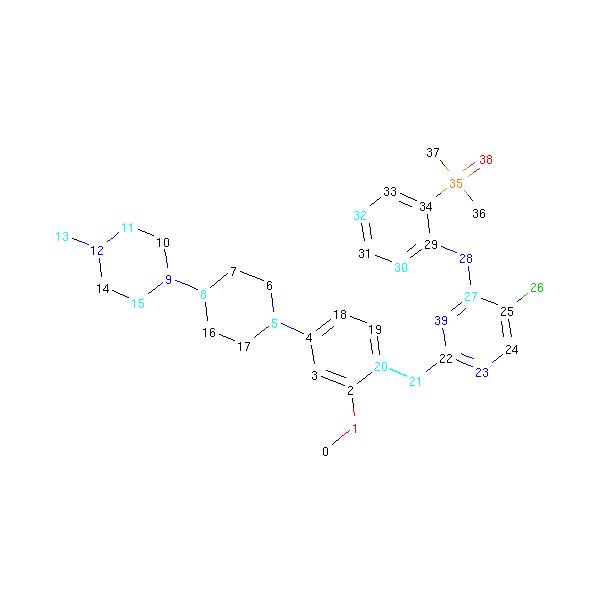

In [47]:
# Brigatinib + 1M17
brigatinib = 'COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(Nc2ccccc2P(C)(C)=O)n1'
brigatinib_attn = [['C', 30], ['C', 13], ['C', 15], ['C', 8], ['C', 20], ['C', 32], ['N', 5], ['C', 27], ['N', 21], ['C', 11]]
brgtb = highlight_atoms(brigatinib, brigatinib_attn)
brgtb.save('brigatini_egfr_1m17_attn.png')
brgtb